<a href="https://colab.research.google.com/github/nazzaladiy/PCVK_Genap_2022/blob/master/FinalProject_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT PCVK**

**MENDETEKSI PARKIR MOBIL DENGAN BEBERAPA METODE PEMBELAJARAN SEBELUMNYA**

Disusun Oleh :
1. Muhammad Akbar Azmi
2. Zalna Hanifa 



METODE FINAL PROJECT YANG DIGUNAKAN :     
1. Metode Grayscale
2. Metode Edge Detection (Deteksi Garis)
3. Metode Object Detection
4. Metode Thresholding

1. IMPORT LIBRARY

In [1]:
#Akses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**METODE GRAYSCALE**

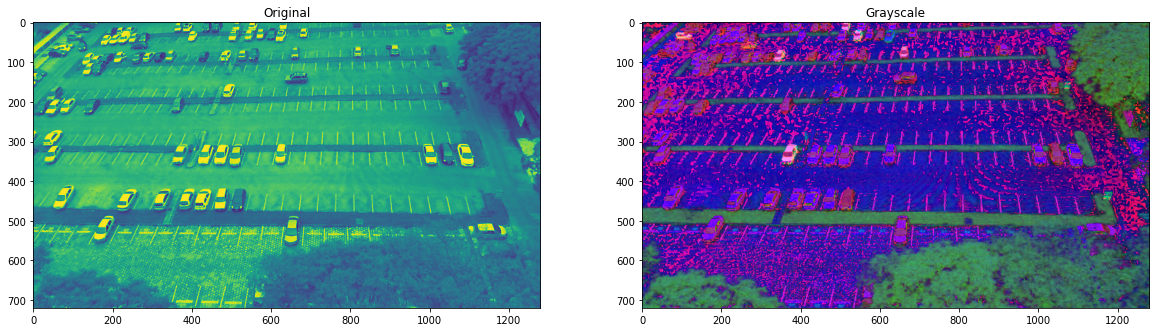

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2hsv

rgb_img = io.imread('/content/drive/MyDrive/Proyek Akhir/Car Park/2012-10-26_07_19_27.jpg')



hsv_hsv = rgb2hsv(rgb_img)
hue_img = hsv_hsv[:,:, 2]

fig, ([ax0, ax1]) = plt.subplots(1,2, figsize=(20, 20))

ax0.imshow(hue_img)
ax0.set_title("Original")
ax1.imshow(hsv_hsv)
ax1.set_title("Grayscale")

plt.show()

**METODE EDGE DETECTION**

Untuk mendeteksi garis tepi

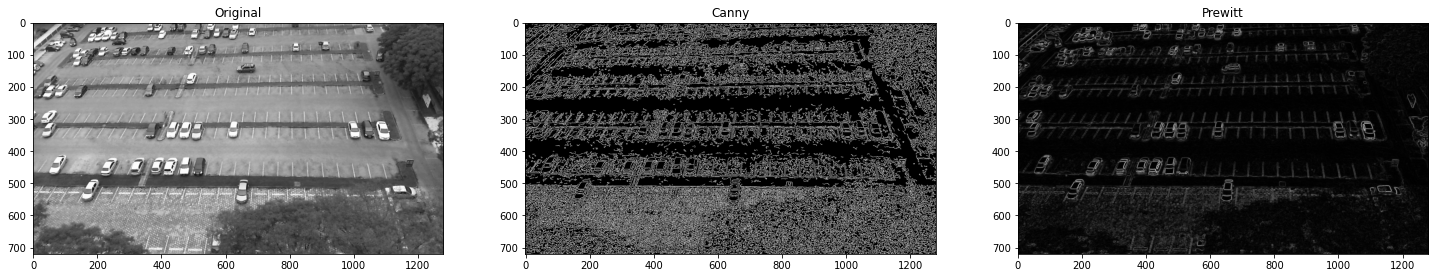

In [4]:
from skimage import data, filters, io
import matplotlib.pyplot as plt
import cv2

img = io.imread('/content/drive/MyDrive/Proyek Akhir/Car Park/2012-10-26_07_19_27.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgC = cv2.Canny(img,20,40)

imgR = filters.roberts(img)
imgP = filters.prewitt(img)
flg, ax = plt.subplots(1,3, figsize=(25,23))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(imgC, cmap='gray')
ax[2].imshow(imgP, cmap='gray')

ax[0].set_title("Original")
ax[1].set_title("Canny")
ax[2].set_title("Prewitt")

plt.show()

**METODE OBJECT DETECTION**

--2022-06-27 16:15:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  72.1MB/s    in 3.5s    

2022-06-27 16:15:43 (67.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-06-27 16:15:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


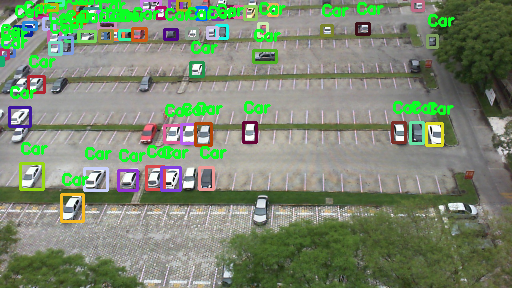

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread('/content/drive/MyDrive/Proyek Akhir/Car Park/2012-10-26_07_19_27.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Memberikan penjelasan yaitu tag "Car" kepada setiap objek yang berhasil dipindai
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CONTOH LAIN :

--2022-06-27 16:16:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  68.4MB/s    in 3.7s    

2022-06-27 16:16:15 (63.9 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-06-27 16:16:15--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s 

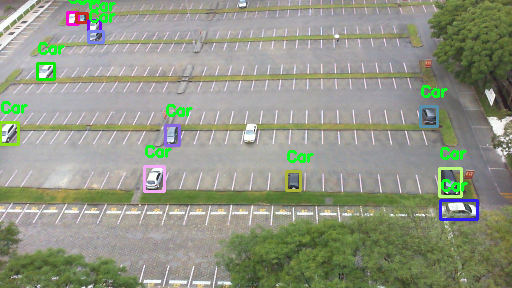

In [6]:
# Load Yolo
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread('/content/drive/MyDrive/Proyek Akhir/Car Park/2012-11-09_06_56_32.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 1/255, (1280, 640), (0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[4:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**METODE THRESHOLDING**

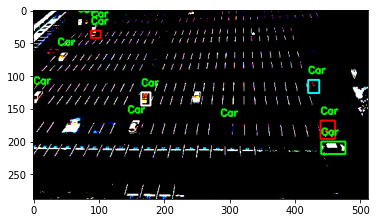

In [ ]:
ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

**METODE MASK R-CNN**

Segmentasi citra adalah tugas mendeteksi dan membedakan beberapa objek dalam satu citra. Secara khusus, Mask R-CNN melakukan "segmentasi instance", yang berarti bahwa instance berbeda dari jenis objek yang sama dalam gambar input, misalnya, mobil, harus diberi label berbeda.

In [7]:
!git clone https://github.com/tensorflow/tpu/

Cloning into 'tpu'...
remote: Enumerating objects: 10883, done.
remote: Counting objects: 100% (1085/1085), done.
remote: Compressing objects: 100% (528/528), done.
remote: Total 10883 (delta 591), reused 967 (delta 533), pack-reused 9798
Receiving objects: 100% (10883/10883), 45.76 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (7629/7629), done.


In [8]:
from IPython import display
from PIL import Image
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import sys
sys.path.insert(0, 'tpu/models/official')
sys.path.insert(0, 'tpu/models/official/mask_rcnn')
import coco_metric
from mask_rcnn.object_detection import visualization_utils

TensorFlow 1.x selected.


In [9]:
ID_MAPPING = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    13: 'stop sign',
    14: 'parking meter',
    15: 'bench',
    16: 'bird',
    17: 'cat',
    18: 'dog',
    19: 'horse',
    20: 'sheep',
    21: 'cow',
    22: 'elephant',
    23: 'bear',
    24: 'zebra',
    25: 'giraffe',
    27: 'backpack',
    28: 'umbrella',
    31: 'handbag',
    32: 'tie',
    33: 'suitcase',
    34: 'frisbee',
    35: 'skis',
    36: 'snowboard',
    37: 'sports ball',
    38: 'kite',
    39: 'baseball bat',
    40: 'baseball glove',
    41: 'skateboard',
    42: 'surfboard',
    43: 'tennis racket',
    44: 'bottle',
    46: 'wine glass',
    47: 'cup',
    48: 'fork',
    49: 'knife',
    50: 'spoon',
    51: 'bowl',
    52: 'banana',
    53: 'apple',
    54: 'sandwich',
    55: 'orange',
    56: 'broccoli',
    57: 'carrot',
    58: 'hot dog',
    59: 'pizza',
    60: 'donut',
    61: 'cake',
    62: 'chair',
    63: 'couch',
    64: 'potted plant',
    65: 'bed',
    67: 'dining table',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remote',
    76: 'keyboard',
    77: 'cell phone',
    78: 'microwave',
    79: 'oven',
    80: 'toaster',
    81: 'sink',
    82: 'refrigerator',
    84: 'book',
    85: 'clock',
    86: 'vase',
    87: 'scissors',
    88: 'teddy bear',
    89: 'hair drier',
    90: 'toothbrush',
}
category_index = {k: {'id': k, 'name': ID_MAPPING[k]} for k in ID_MAPPING}

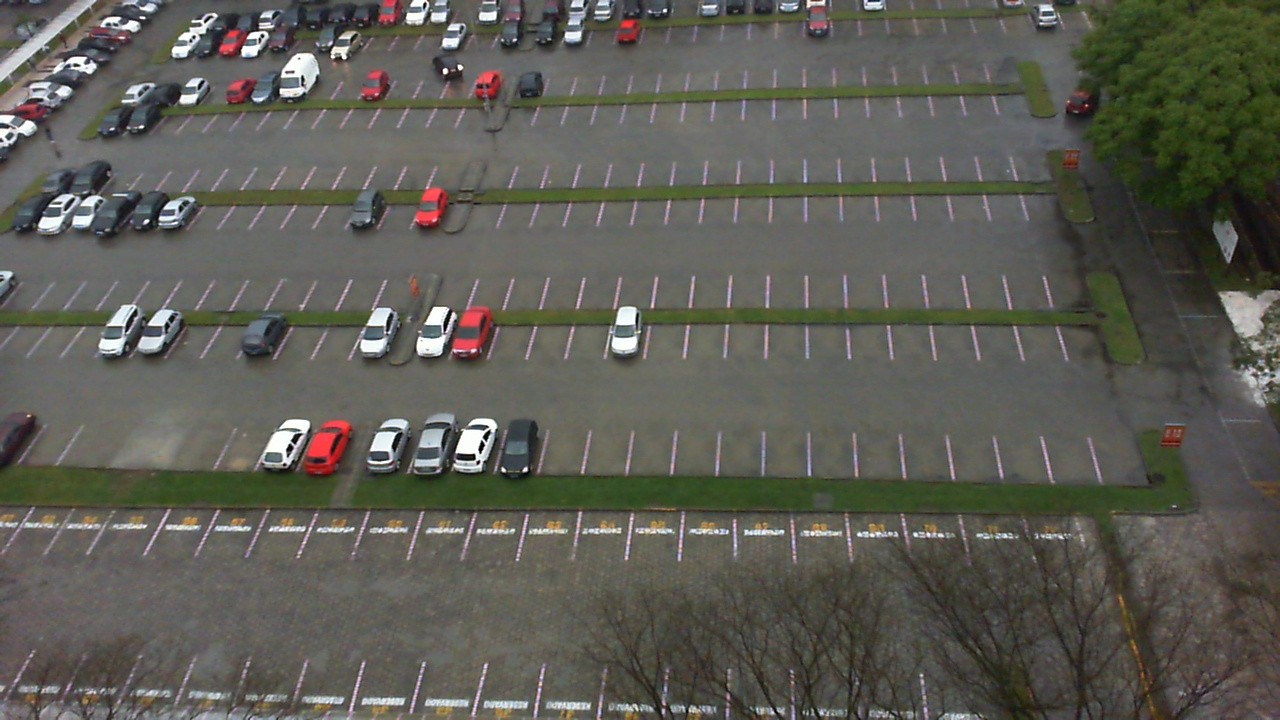

In [10]:
#load an image

image_path = '/content/drive/MyDrive/Proyek Akhir/Car Park/2012-09-21_07_20_13.jpg'

with open(image_path, 'rb') as f:
  np_image_string = np.array([f.read()])
  
image = Image.open(image_path)
width, height = image.size
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image(image_path, width=1024))

In [11]:
# Create a Tensorflow session to run the inference

session = tf.Session(graph=tf.Graph())


# Loading the COCO pretrained saved model from the public GCS bucket.
saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850'
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://cloud-tpu-checkpoints/mask-rcnn/1555659850/variables/variables


In [12]:
num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
    ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
    feed_dict={'Placeholder:0': np_image_string})

num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)

In [19]:
det_class=[]
det_box=[]
det_score=[]
seg=[]

for i in range(len(detection_classes)):
  if detection_classes[i]==3:
    det_class.append(detection_classes[i])
    det_box.append(detection_boxes[i])
    det_score.append(detection_scores[i])
    seg.append(segmentations[i])

In [20]:
seg1=np.array(seg)
det_class1=np.array(det_class)
det_box1=np.array(det_box)
det_score1=np.array(det_score)

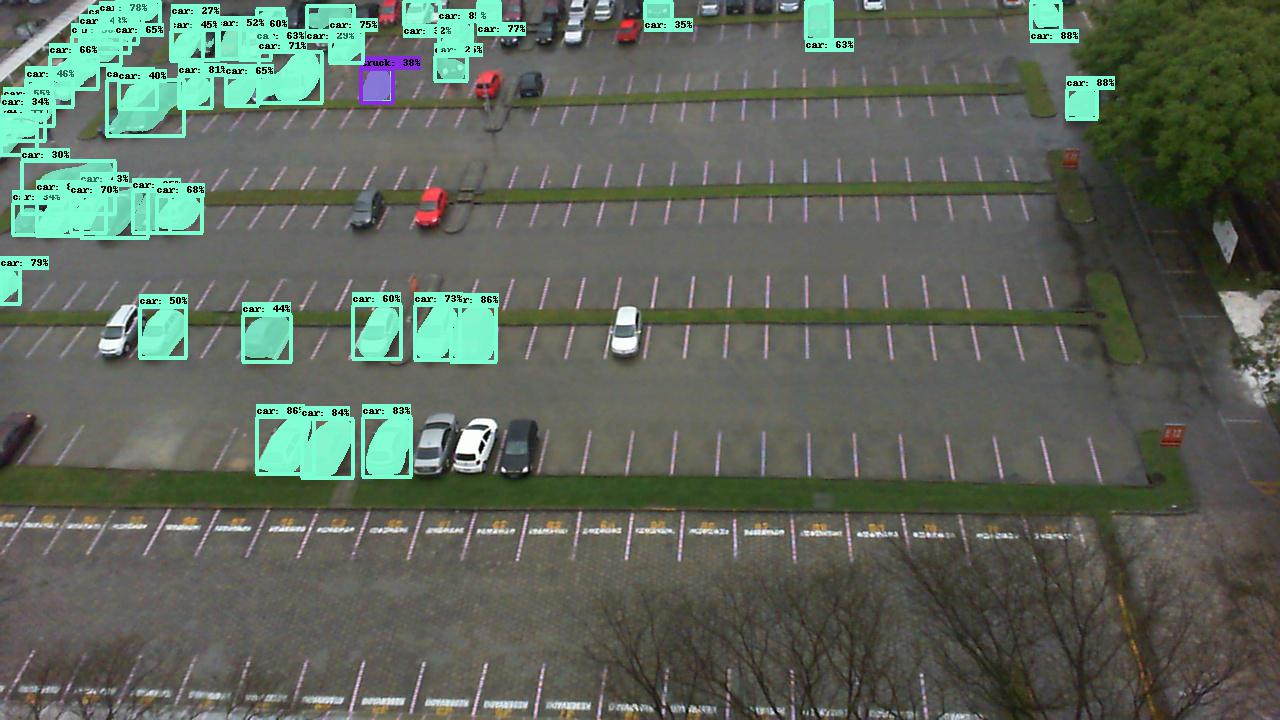

In [21]:
# Visualize the detection results

max_boxes_to_draw = 100
min_score_thresh = 1

image_with_detections = visualization_utils.visualize_boxes_and_labels_on_image_array(
    np_image,
    det_box1,
    det_class1,
    det_score1,
    category_index,
    instance_masks=seg1,
    use_normalized_coordinates=False,
    max_boxes_to_draw=max_boxes_to_draw,
    min_score_thresh=min_score_thresh)
output_image_path = 'test_results.jpg'
Image.fromarray(image_with_detections.astype(np.uint8)).save(output_image_path)
display.display(display.Image(output_image_path, width=1024))

In [22]:
string = ' Predicted count: ' + str(len(det_class)) 
print(string)

 Predicted count: 78


**Referensi :**

1. Jobsheet 11
2. https://colab.research.google.com/github/tensorflow/tpu/blob/master/models/official/mask_rcnn/mask_rcnn_demo.ipynb#scrollTo=t_iHs_wm2Mhh
3. https://cocodataset.org/#home